In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
plt.style.use('seaborn')

## Generate Data

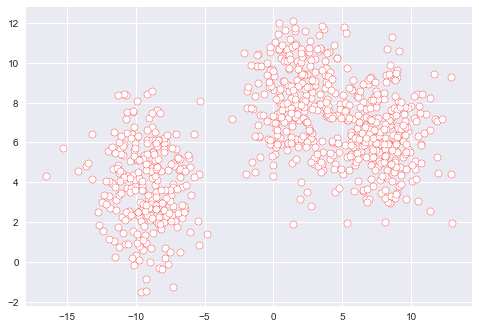

In [3]:
# create dataset
X, _ = make_blobs(n_samples=800, n_features=2, 
                  centers=3, cluster_std=1.9, 
                  shuffle=True, random_state=20)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', edgecolor='red', marker='o', s=50
)

plt.show()

In [11]:
X

array([[ 1.54363307,  7.29564511],
       [ 8.63391121,  7.30007938],
       [ 3.75972251,  8.72637457],
       ...,
       [ 1.31793424,  7.46906593],
       [-6.50192748,  2.52408615],
       [-6.93820105,  5.20468272]])

## Model Data

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=20)
y_km = km.fit_predict(X)

## Plot Cluster

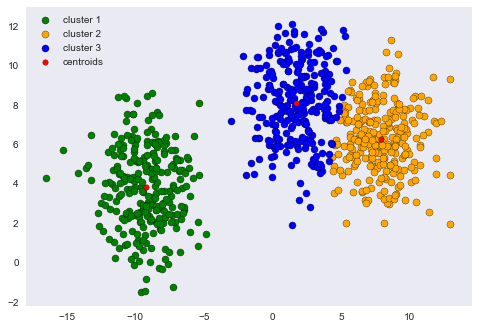

In [6]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## Elbow Method

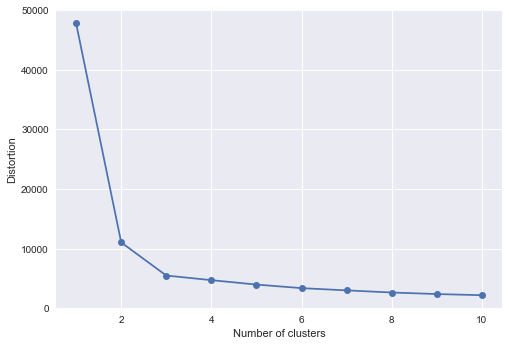

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean')
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6765438145642199
For n_clusters=3, the silhouette score is 0.58015511197328
For n_clusters=4, the silhouette score is 0.4629211359412539
For n_clusters=5, the silhouette score is 0.3952037660073391
For n_clusters=6, the silhouette score is 0.3451932980890935
For n_clusters=7, the silhouette score is 0.3494279082550061
For n_clusters=8, the silhouette score is 0.34262836645602335


---